### Investigation of drivers for Revenues of Movies

## Table of Contents
- [Introduction](#intro)
- [Data Wrangling](#wrangling)
- [Data Cleaning](#datacleaning)
- [Exploratory Data Analysis](#eda)
- [Conclusions](#conc)


<a id='intro'></a>
## Introduction

> The purpose of this project is to gain more insight in the **revenues of movies**, this project will search for correlations between features of movies, such as budget, director and more. The data set that is used contains information about 11,000 movies collected from
The Movie Database (TMDb). The dataset provides data on (among others), budget, revenue, director and release year. This information should help us to find out **if correlation exists** between revenue streams and other features of a movie.




In [311]:
# Import all packages needed for the analyses
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, the data will be loaded, checked, and then trimmed and cleaned for analysis.

### General Properties

In [312]:
# Load data and print out a few lines.
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [313]:
# Inspect data types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### First glance

> On first glance the datatypes seem to be fine, there are some missing data fields in the different columns. Some datafeatures are not important for this analyses, such as tagline, so we can delete the columns we will not need. And for the columns we will need, such as director, we will delete the rows in the dataset where there is no director mentioned.



In [314]:
# Inspect data content on multiple levels
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Second glance

> What is **directly** obvious from this output is the fact that for **2 important features** (budget and revenue) there are a lot of movies with **\$0** filled in for one or both of these fields. This can be seen in the min row, but also up to the 50<sup>th</sup> percentile the values are **\$0**. We will need to delete these rows as they do not supply correct information, and therefor will harm the analyses.

<a id='datacleaning'></a>
## Data Cleaning 

#### Step 1 - Remove redundant information
We will first start with **deleting the columns** we will not need.
The columns __'tagline', 'keywords', 'cast', 'overview', 'production companies' and 'homepage'__ are not relevant for this analyses so we will drop them. We will also drop the columns 'budget' and 'revenue', allthough these columns are relevant we will use the adjusted columns instead. These adjusted columns have taken into account the inflation rate of the usd, making it possible to compare values over the years.

In [315]:
# Dropping irrelevant columns for this analyses
df.drop(columns=['tagline', 'keywords', 'cast', 'overview', 'budget'], axis=1, inplace=True)
df.drop(columns=['revenue', 'production_companies', 'homepage'], axis=1, inplace=True)


#### Step 2 - Remove rows without information on budget and revenue
As described before, both data on budget as well as on revenue are not fully available. At least more than half of the rows do not contain information on this topic. Allthough theoretically a movie could be made without a budget, and also generate zero revenues, for this analyses we will focus on movies with actual budgets and revenues. We therefor filter our dataset to show data with revenues and budget above zero.

In [316]:
# Filter dataset for budget_adj and revenue_adj above zero
df = df[df['budget_adj']>0.01]
df = df[df['revenue_adj']>0.01] 

#### Step 3 - Check the dataset
Let's check how the dataset looks like after the first 2 steps.
It is obvious that the dataset is a lot smaller that at the start, around 2/3 of the rows did not contain data on revenues and/or budget.
If we take a closer look at the dataset we still see some strange values with regards to budget and revenue. Looking at the minimum values, it shows a budget of **\$0.97** and revenues of **\$2.37**, we need to take a closer look to see if this data is correct.
It does look like that our dataset does not have anymore missing values, except for 1 director missing we will delete that row later on. 

In [317]:
# Inspect data types and look for instances of missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 13 columns):
id                3855 non-null int64
imdb_id           3855 non-null object
popularity        3855 non-null float64
original_title    3855 non-null object
director          3854 non-null object
runtime           3855 non-null int64
genres            3855 non-null object
release_date      3855 non-null object
vote_count        3855 non-null int64
vote_average      3855 non-null float64
release_year      3855 non-null int64
budget_adj        3855 non-null float64
revenue_adj       3855 non-null float64
dtypes: float64(4), int64(4), object(5)
memory usage: 421.6+ KB


In [318]:
# Inspect data content on multiple levels
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3855.000000,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,39888.783398,1.191400,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,67213.815955,1.475002,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,5.000000,0.001117,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,6074.000000,0.462448,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,11322.000000,0.797298,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,38577.000000,1.368245,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,417859.000000,32.985763,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


#### Step 4 - Final Steps
Let's first get a close look of the data with the extremely low budgets and then do the same for revenues.

In [266]:
# Show all movies with a budget lower than $1000
df[df['budget_adj']<1000]


,id,imdb_id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1733,22717,tt1084972,0.278387,Wanted,Prabhu Deva,129,Action|Comedy|Crime|Thriller,9/18/09,18,4.9,2009,76.230033,1.361977e+02
2398,39356,tt1560139,0.028456,Boy,Taika Waititi,87,Drama|Comedy,2/14/10,26,7.3,2010,3.000000,4.300000e+01
2519,10397,tt0145653,0.352060,Angela's Ashes,Alan Parker,145,Drama,12/25/99,24,7.0,1999,32.726321,1.701769e+01
2618,39964,tt0120836,0.090186,Lost & Found,Jeff Pollack,95,Comedy|Romance,4/23/99,14,4.8,1999,1.309053,1.309053e+02
3581,59296,tt1436559,0.520430,"Love, Wedding, Marriage",Dermot Mulroney,90,Comedy|Romance,6/3/11,55,5.3,2011,0.969398,1.335831e+03
3608,50217,tt0893412,0.463510,From Prada to Nada,Angel Gracia,107,Comedy|Drama|Romance,1/28/11,47,5.2,2011,90.154018,2.423495e+06
3853,62796,tt1831829,0.098896,William & Kate,Mark Rosman,83,Drama|Romance,4/18/11,18,5.9,2011,19.387961,1.454097e+01
3968,4614,tt0164184,0.958182,The Sum of All Fears,Phil Alden Robinson,124,Thriller|Action|Drama,5/31/02,256,5.7,2002,82.433775,2.339664e+02
4675,63574,tt1710396,0.316117,Joyful Noise,Todd Graff,117,Comedy|Music,1/13/12,25,6.7,2012,23.743607,2.849233e+01
5162,24914,tt0368574,0.208637,Kid's Story,Shinichiro Watanabe,15,Science Fiction|Animation,6/2/03,16,6.8,2003,11.853526,5.926763e+00


#### Comment on budget lower than 1000 dollar
If we check a couple of the 22 cases that have a budget lower than 1000 dollar, we see that the data is probably incorrect. Movies like _The Hunt for Red October_ and _The Karate Kid Part II_, were not made for either **\$50** or **\$224** . Allthough we will not check every movie it is better to discard these outliers. We will do so after the performing the same check for movies with extemely low revenues.

In [267]:
# Show all movies with revenues lower than $1000
df[df['revenue_adj']<1000]

,id,imdb_id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1733,22717,tt1084972,0.278387,Wanted,Prabhu Deva,129,Action|Comedy|Crime|Thriller,9/18/09,18,4.9,2009,7.623003e+01,136.197658
2398,39356,tt1560139,0.028456,Boy,Taika Waititi,87,Drama|Comedy,2/14/10,26,7.3,2010,3.000000e+00,43.000000
2519,10397,tt0145653,0.352060,Angela's Ashes,Alan Parker,145,Drama,12/25/99,24,7.0,1999,3.272632e+01,17.017687
2618,39964,tt0120836,0.090186,Lost & Found,Jeff Pollack,95,Comedy|Romance,4/23/99,14,4.8,1999,1.309053e+00,130.905285
3239,14301,tt1227926,0.352054,Dr. Horrible's Sing-Along Blog,Joss Whedon,42,Adventure|Action|Comedy|Science Fiction|Music,7/15/08,140,7.7,2008,2.025573e+05,3.038360
3853,62796,tt1831829,0.098896,William & Kate,Mark Rosman,83,Drama|Romance,4/18/11,18,5.9,2011,1.938796e+01,14.540971
3968,4614,tt0164184,0.958182,The Sum of All Fears,Phil Alden Robinson,124,Thriller|Action|Drama,5/31/02,256,5.7,2002,8.243377e+01,233.966449
4675,63574,tt1710396,0.316117,Joyful Noise,Todd Graff,117,Comedy|Music,1/13/12,25,6.7,2012,2.374361e+01,28.492328
4970,10009,tt0328880,1.653031,Brother Bear,Aaron Blaise|Robert Walker,85,Animation|Adventure|Family|Fantasy,10/20/03,753,6.8,2003,1.185353e+08,296.338161
5060,10944,tt0199626,0.481708,In the Cut,Jane Campion,119,Thriller|Mystery,9/9/03,36,4.7,2003,1.422423e+07,27.263111


#### Comment on revenues lower than 1000 dollar
Again here, if we checked a couple of the 31 cases that have revenues lower than \$1000 , we see that the data is probably incorrect. A quick search on the internet learns that movies like _The Hunt for Red October_ and _Brother Bear_, did bring in more than **\$300**. (source: www.boxofficemojo.com). Again we will not check every movie but it is better to discard these outliers, we will set the minimum at **\$1000** for both revenues as well as budgets. If any outliers still exist we will deal with that the during the analyses phase.

In [319]:
# Filter dataset for budget_adj and revenue_adj above zero
df = df[df['budget_adj']>1000]
df = df[df['revenue_adj']>1000]

In [320]:
# check if data changed
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3.820000e+03,3.820000e+03
mean,39968.198168,1.197872,109.307853,531.473037,6.170052,2001.280890,4.453979e+07,1.382208e+08
std,67354.717579,1.479861,19.842229,882.829213,0.794036,11.296889,4.482926e+07,2.166912e+08
min,5.000000,0.001117,26.000000,10.000000,2.200000,1960.000000,6.310011e+03,1.840604e+03
25%,6071.000000,0.465197,96.000000,72.000000,5.700000,1995.750000,1.336182e+07,1.910216e+07
50%,11316.000000,0.804415,106.000000,206.000000,6.200000,2004.000000,3.030653e+07,6.245848e+07
75%,38576.000000,1.380126,119.000000,583.000000,6.700000,2010.000000,6.076720e+07,1.648108e+08
max,417859.000000,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [321]:
#Data check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3820 entries, 0 to 10848
Data columns (total 13 columns):
id                3820 non-null int64
imdb_id           3820 non-null object
popularity        3820 non-null float64
original_title    3820 non-null object
director          3819 non-null object
runtime           3820 non-null int64
genres            3820 non-null object
release_date      3820 non-null object
vote_count        3820 non-null int64
vote_average      3820 non-null float64
release_year      3820 non-null int64
budget_adj        3820 non-null float64
revenue_adj       3820 non-null float64
dtypes: float64(4), int64(4), object(5)
memory usage: 417.8+ KB


#### Last Actions on cleaning
As you can see above there is still one element missing in the data. The director for one of the movies has not been entered in the dataset.
We will remove that row and perform one last check if duplicates exist. We will check for duplicates on ID, if duplicates are found these will be removed, after that the trimmed file will be saved as a new dataset.

In [322]:
#Filter on rows with director filled
df = df[df['director'].isnull() == False]

In [323]:
#Check and show duplicates
df[df.duplicated(['id'], keep=False)]

,id,imdb_id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0


In [324]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [325]:
#Final check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 10848
Data columns (total 13 columns):
id                3818 non-null int64
imdb_id           3818 non-null object
popularity        3818 non-null float64
original_title    3818 non-null object
director          3818 non-null object
runtime           3818 non-null int64
genres            3818 non-null object
release_date      3818 non-null object
vote_count        3818 non-null int64
vote_average      3818 non-null float64
release_year      3818 non-null int64
budget_adj        3818 non-null float64
revenue_adj       3818 non-null float64
dtypes: float64(4), int64(4), object(5)
memory usage: 417.6+ KB


In [326]:
# Save trimmed dataset
df.to_csv('tmdb_movies_trimmed.csv')

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Is the budget of a movie a predictor of revenue? 

#### Check for patterns in the data
> A scatterplot was used to quickly identify if any interesting patterns would occur. Looking solely at budget: release_year looks to have an effect on budget and for revenues it is hard to say anything at this stage. We need to dig deeper.


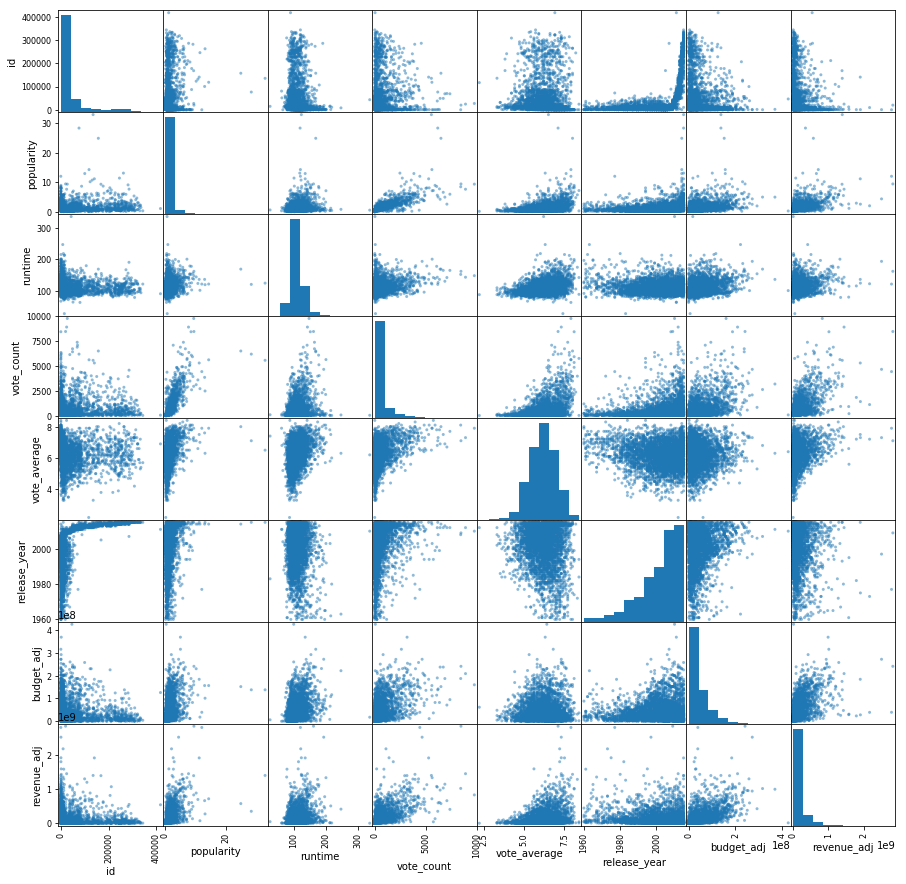

In [328]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

#### Zooming in on Revenues and budget
> First we plot Revenues against budget to see if we can say anytrhing about coorelation between these two variables.

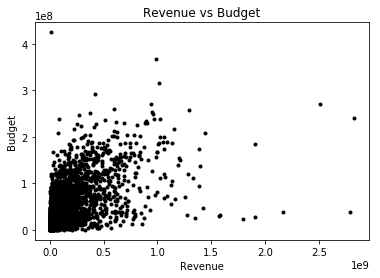

In [277]:
#Plot Movie Revenues and movie budgets to check for correlation

x=df['revenue_adj']
y=df['budget_adj']
plt.plot(x, y, '.', color='black')

#Set title and axis lables
plt.title("Revenue vs Budget")
plt.xlabel("Revenue")
plt.ylabel("Budget");

The sactterplot does not reveal much information, due to the amount of data points and outliers.
We need to take a look a closer look at the lower region of budget and revenues. As purely looking at the data from large budgets and revenues, no pattern can be discerned.
We zoom in at the 50% percentile of both revenue (**\$30 mln**) and budget (**\$60 mln**)


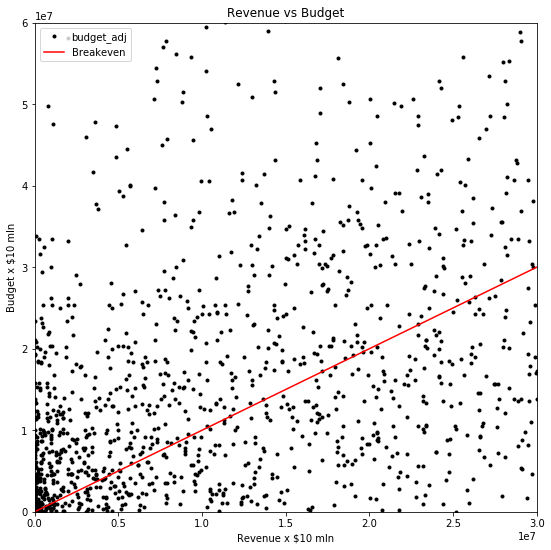

In [329]:
#Plot Movie Revenues and movie budgets to check for correlation
plt.figure(figsize=(9,9))
x=df['revenue_adj']
y=df['budget_adj']
plt.plot(x, y, '.', color='black')

# Zoom in on 50 percentile
plt.xlim(0,30000000)
plt.ylim(0,60000000)

# Draw straight line to depict profitability
z=np.linspace(0,30000000)
plt.plot(z,z,'-r', label='Breakeven')

#Set title and axis lables
plt.title("Revenue vs Budget")
plt.xlabel("Revenue x $10 mln")
plt.ylabel("Budget x $10 mln")
plt.legend(loc='upper left');

Again, unfortunately for investors, budgets and revenues _do not seem_ to be correlated. The red line depicts the position where budget and revenue are equeal. No money is lost or made if the movie is on that line. Movies below the line are profitable, and above loss making. It appears that there are **more movies loss making than profitable** in this dataset.

Below we will calculate the percentage of profitable movies in the dataset, before moving on to the next possible correlation.


In [279]:
#Create column where budget is subtracted from revenue and calculate % of movies greater than 0
df['profit'] = df['revenue_adj']-df['budget_adj']
df[(df['profit']>0)].shape[0]/df.shape[0]

0.7226296490309062

##### Most movies in the dataset are profitable

Well, apparently looks can be deceiving. More than **72%** of the movies in the dataset are profitable.

### Research Question 2: Is the release year of a movie a predictor of budget?
>Another question that can be asked if more money is spent on movies today than in the past. Looking at the scatter before there seems to be an interesting pattern. As dollars can be comparerd between the years (inflation corrected figures) we will try and vislualise any pattern between these 2 variables.

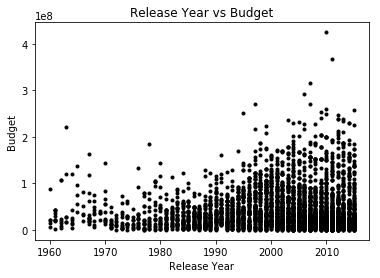

In [280]:
#Plot Movie Revenues and release year to check for correlation

x=df['release_year']
y=df['budget_adj']
plt.plot(x, y, '.', color='black')


#Set title and axis lables
plt.title("Release Year vs Budget")
plt.xlabel("Release Year")
plt.ylabel("Budget");



##### Pattern in the data: budget vs release year
> A pattern is visible, however the outliers in the different years make it less obvious. Let's first remove the outliers and than look at the diagram again. We will remove the top 5 budget's per year to make sure we do not have any extremes in the data. This will mean that for the ealier years (1960-1975) there will be very few movies included in the data. 


In [331]:
# Create column rank, which ranks the budget amount within a specific year:
# Source:stackoverflow.com question #17604665

df['rank_budget'] = df.groupby('release_year')['budget_adj'].rank(ascending=False)

In [332]:
#Create a dataframe which excludes the top 5 movie budgets per year
df_exo = df.query('rank_budget >5')

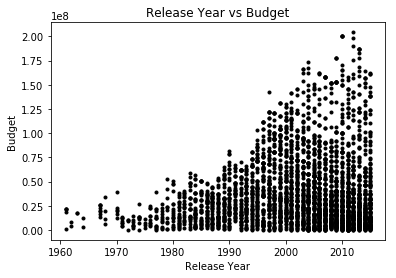

In [333]:
#Plot Movie Revenues and movie budgets to check for correlation

x=df_exo['release_year']
y=df_exo['budget_adj']
plt.plot(x, y, '.', color='black')


#Set title and axis lables
plt.title("Release Year vs Budget")
plt.xlabel("Release Year")
plt.ylabel("Budget");


#### Release year and height of budget seem correlated
>The chart shows quite a clear picuture, the range of budgets for movies seem to widen. Meaning _"cheap"_ movies are made throughout time, but _"expensive"_ movies keep on getting more expensive as time goes by.

### Research Question 3: Is the experience of the director a predictor of budget?
>Another question we can ask is if the director is correlated with the budget of a movie. In other words is it true that some directors tend to work with higher budgets than others. As this is quite an investigation, we narrow the question to, do experienced directors work with higher budgets?

We first need to classify experience and than perform the analyses:

- One Timer (1 movie in the data set)
- Beginner (2-3 movies in the data set)
- Established (4-6 movies in the data set)
- Guru (6+ movies in the data set)



In [339]:
# Check how many movies there are in the dataset per director
df['movie_count'] = df.groupby('director')['id'].transform('count')


In [341]:
# Show details to determine experience, based on percentiles
df.describe().movie_count

count    3818.000000
mean        4.869565
std         4.673042
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        27.000000
Name: movie_count, dtype: float64

In [342]:
# Divide the data in groups accroding to # of movies made per director
bin_edges = [0,1,3,7,27]

In [343]:
# Labels for the  level groups
bin_names = ['a_one_timer', 'b_beginner', 'c_established', 'd_guru'] 

In [344]:
# Creates acidity_levels column
df['expert_level'] = pd.cut(df['movie_count'], bin_edges, labels=bin_names)

df.head()

,id,imdb_id,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,rank_budget,movie_count,avg_budj,expert_level
0,135397,tt0369610,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,12.5,2,6.935612e+07,b_beginner
1,76341,tt1392190,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,12.5,6,8.309657e+07,c_established
2,262500,tt2908446,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,19.5,5,7.638698e+07,c_established
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,3.0,5,1.450053e+08,c_established
4,168259,tt2820852,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,4.5,6,3.865341e+07,c_established


In [348]:
# Add mean budget per expert level to the dataset
df['avg_budg_exp'] = df.groupby('expert_level')['budget_adj'].transform('mean')


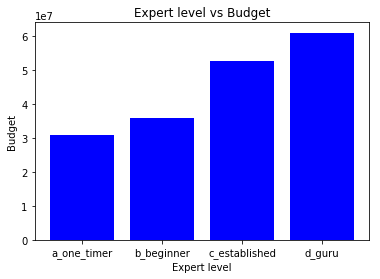

In [350]:
#Plot Movie Revenues and movie budgets to check for correlation
sorted = df.sort_values(by=['expert_level'])
x=sorted['expert_level']
y=sorted['avg_budg_exp']
plt.bar(x, y, color='blue')


#Set title and axis lables
plt.title("Expert level vs Budget")
plt.xlabel("Expert level")
plt.ylabel("Budget");

#### Experience of a director impacts budget
>According to this dataset, the number of movies made by a director (level of experience) seems to be a predictor of the average budget he/she can work with. in other words, the more movies you made, the more budget you can get for your movie.

In [351]:
# Add mean revenue per expert level to the dataset
df['avg_rev_exp'] = df.groupby('expert_level')['revenue_adj'].transform('mean')


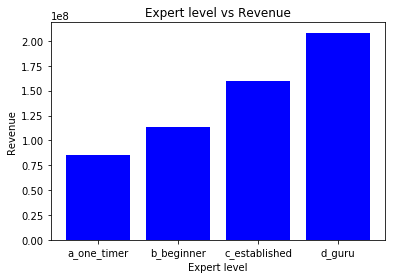

In [353]:
#Plot Movie Revenues and movie budgets to check for correlation
sorted = df.sort_values(by=['expert_level'])
x=sorted['expert_level']
y=sorted['avg_rev_exp']
plt.bar(x, y, color='blue')


#Set title and axis lables
plt.title("Expert level vs Revenue")
plt.xlabel("Expert level")
plt.ylabel("Revenue");

#### Experience of a director impacts revenue
>According to this dataset, the number of movies made by a director (level of experience) seems to be a predictor of the average revenue he/she generates. In other words, the more movies you made, the more revenues your movies make.

<a id='conc'></a>
## Conclusions

> The dataset that has been explored gave many interesting insights on the different parameters of movies. This investigation focussed on budgets and revenues of movies. As far as we can judge from the investigation there seems to be a correlation between budget and epxeperience of directors, this goes as well for revenues. Does that mean we need to give more experienced movie makers more money so they can produce more revenue? <br>
That question cannot be answered solely on this investigation, the data also shows that budget is not a predictor of revenues. Further investigation should be done to see if any of the findings have statistical relevance. 


<a id='conc'></a>
#### Acknowledgements

> The code and markdown help used in the investigation comes form the following sources:
- Udacity Data Analyst Nanodegree
- [stackoverflow.com](stackoverflow.com) where possible I posted the link in the code, in other instances I used multiple posts and combined them to one code.
- [Python Data Science Hand book ](https://jakevdp.github.io/PythonDataScienceHandbook/)by Jake vanderPlas